In [2]:
from sklearn import cluster, datasets
iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target
k_means = cluster.KMeans(n_clusters=3)
k_means.fit(X_iris)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [4]:
k_means.labels_[::10]

array([0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1])

In [5]:
y_iris[::10]

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2])

In [6]:
# Clustering in general and KMeans, in particular, can be seen as a way of choosing a small number of exemplars to compress
# the information. This problem is sometimes known as vector quantization. For instance, this can be used to posterize an image
import scipy as sp
try:
    face = sp.face(gray=True)
except AttributeError:
    from scipy import misc
    face = misc.face(gray=True)
X = face.reshape((-1, 1))
k_means = cluster.KMeans(n_clusters=5, n_init=1)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [8]:
import numpy as np
values = k_means.cluster_centers_.squeeze()
labels = k_means.labels_
face_compressed = np.choose(labels, values)
face_compressed.shape = face.shape

In [9]:
face

array([[114, 130, 145, ..., 119, 129, 137],
       [ 83, 104, 123, ..., 118, 134, 146],
       [ 68,  88, 109, ..., 119, 134, 145],
       ..., 
       [ 98, 103, 116, ..., 144, 143, 143],
       [ 94, 104, 120, ..., 143, 142, 142],
       [ 94, 106, 119, ..., 142, 141, 140]], dtype=uint8)

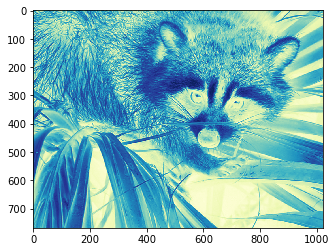

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(face, cmap=plt.cm.YlGnBu, interpolation='nearest');

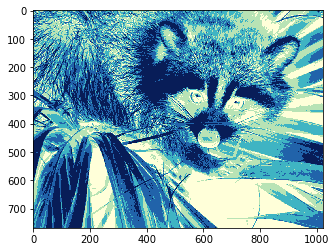

In [17]:
plt.imshow(face_compressed, cmap=plt.cm.YlGnBu, interpolation='nearest');

In [18]:
# Hierarchical agglomerative clustering
# Agglomerative (eg Mean Shift): Agglomerates clusters at each step
# Divisive (impractical): Divides into subclusters recursively
import matplotlib.pyplot as plt
from sklearn.feature_extraction.image import grid_to_graph
from sklearn.cluster import AgglomerativeClustering

try:
    from scipy.misc import face
    face = face(gray=True)
except ImportError:
    face = sp.face(gray=True)
    
face = sp.misc.imresize(face, 0.10) / 255.
X = np.reshape(face, (-1, 1))

connectivity = grid_to_graph(*face.shape)

In [19]:
digits = datasets.load_digits()
images = digits.images
X = np.reshape(images, (len(images), -1))
connectivity = grid_to_graph(*images[0].shape)
agglo = cluster.FeatureAgglomeration(connectivity=connectivity, n_clusters=32)
agglo.fit(X)

FeatureAgglomeration(affinity='euclidean', compute_full_tree='auto',
           connectivity=<64x64 sparse matrix of type '<class 'numpy.int32'>'
	with 288 stored elements in COOrdinate format>,
           linkage='ward', memory=Memory(cachedir=None), n_clusters=32,
           pooling_func=<function mean at 0x00000205385E4268>)

In [20]:
X_reduced = agglo.transform(X)
X_approx = agglo.inverse_transform(X_reduced)
images_approx = np.reshape(X_approx, images.shape)

In [21]:
X_reduced

array([[  5.8,  14. ,   5.5, ...,   0. ,   0. ,   5. ],
       [  0. ,  11.5,  16. , ...,  16. ,  16. ,   0. ],
       [  0. ,  10. ,  10.5, ...,  16. ,  13. ,   0. ],
       ..., 
       [  1.2,  13.5,  15.5, ...,  14. ,  16. ,   1. ],
       [  3.2,  13. ,   3.5, ...,   0. ,  14. ,   2. ],
       [  0. ,  14. ,   6. , ...,   6. ,  15. ,  10. ]])

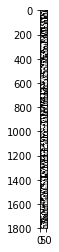

In [27]:
plt.imshow(X_approx, cmap=plt.cm.gray_r, interpolation='nearest');

In [28]:
# Principal component analysis: selects the successive components that explain the maximum variance in the signal
x1 = np.random.normal(size=100)
x2 = np.random.normal(size=100)
x3 = x1 + x2

In [29]:
x3\

array([-0.74147048, -0.67543205, -1.21560164, -1.34279245, -0.80289829,
        1.62797788,  0.26025816,  0.06091396,  1.58575057,  0.42194089,
        0.13058526, -2.3789097 , -0.49187239, -0.71876681,  0.40556667,
        0.70296017, -1.68599158, -1.29919379, -1.730161  , -2.32952732,
       -0.02699959,  0.59615929,  1.13770231, -2.13206737,  0.93397085,
       -0.90738295, -0.34546685, -1.00440114, -0.74255778,  1.45875003,
       -1.09184853,  0.77426004, -0.44962866, -0.67923749,  1.15994784,
       -0.5129353 , -0.82891226, -0.98656407,  1.63828058,  1.95528887,
        0.65782004, -0.03297193, -0.77880862, -0.74458149,  1.18615001,
       -1.92031084,  0.65939613, -0.64284635,  0.84176249,  0.73527367,
        0.29742746, -1.05750967, -2.07892873, -0.04664166, -0.32071851,
       -1.54152522, -0.73537595, -1.39865942,  3.89583531, -0.46669134,
        1.66995184,  1.97759588, -0.55343293, -0.80674841,  0.15992927,
        0.38677783,  1.0810531 , -0.94637622, -1.38137083,  1.61

In [30]:
X = np.c_[x1, x2, x3]

In [31]:
X

array([[ -1.34371655e+00,   6.02246077e-01,  -7.41470477e-01],
       [ -1.08901438e+00,   4.13582327e-01,  -6.75432049e-01],
       [  7.82248658e-01,  -1.99785030e+00,  -1.21560164e+00],
       [ -2.70977868e-01,  -1.07181458e+00,  -1.34279245e+00],
       [ -1.78714223e+00,   9.84243937e-01,  -8.02898291e-01],
       [  5.02677319e-01,   1.12530056e+00,   1.62797788e+00],
       [  1.30726980e+00,  -1.04701164e+00,   2.60258160e-01],
       [ -8.75283114e-01,   9.36197074e-01,   6.09139603e-02],
       [  7.68596341e-01,   8.17154234e-01,   1.58575057e+00],
       [ -1.93251136e-01,   6.15192029e-01,   4.21940893e-01],
       [ -1.38888138e+00,   1.51946664e+00,   1.30585257e-01],
       [ -4.80007207e-02,  -2.33090898e+00,  -2.37890970e+00],
       [  1.04968412e+00,  -1.54155651e+00,  -4.91872390e-01],
       [  5.70602477e-02,  -7.75827058e-01,  -7.18766810e-01],
       [ -7.45595173e-01,   1.15116184e+00,   4.05566669e-01],
       [  9.94688936e-01,  -2.91728766e-01,   7.0296016

In [32]:
from sklearn import decomposition
pca = decomposition.PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [33]:
print(pca.explained_variance_)

[  2.44374281e+00   1.12010900e+00   8.51071583e-32]


<Container object of 3 artists>

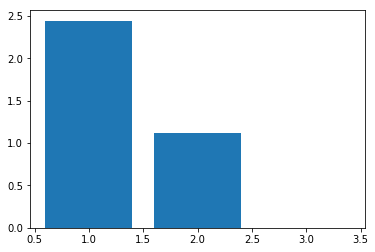

In [36]:
plt.bar([1, 2, 3], pca.explained_variance_)

In [37]:
pca.n_components = 2
X_reduced = pca.fit_transform(X)
X_reduced.shape

(100, 2)

In [38]:
# Independent component analysis: It is able to recover non-Gaussian independent signals
import numpy as np
from scipy import signal
time = np.linspace(0, 10, 2000)
s1 = np.sin(2 * time)
s2 = np.sign(np.sin(3 * time))
s3 = signal.sawtooth(2 * np.pi * time)
S = np.c_[s1, s2, s3]

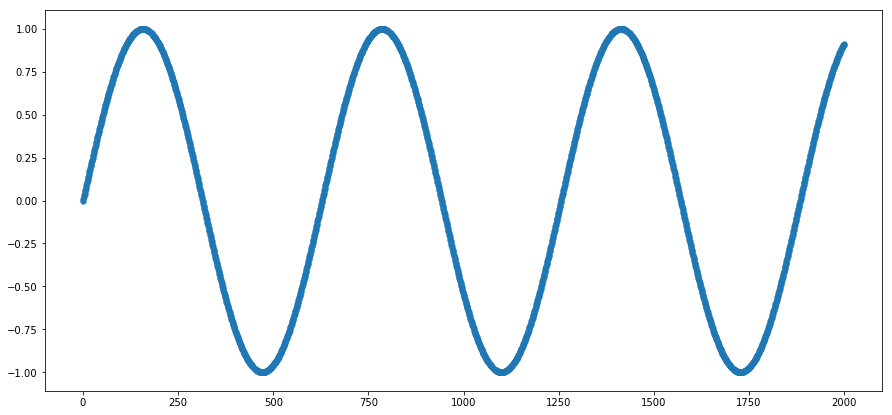

In [47]:
plt.figure(figsize=(15, 7))
plt.scatter(range(len(s1)), s1, linewidth=0.2)

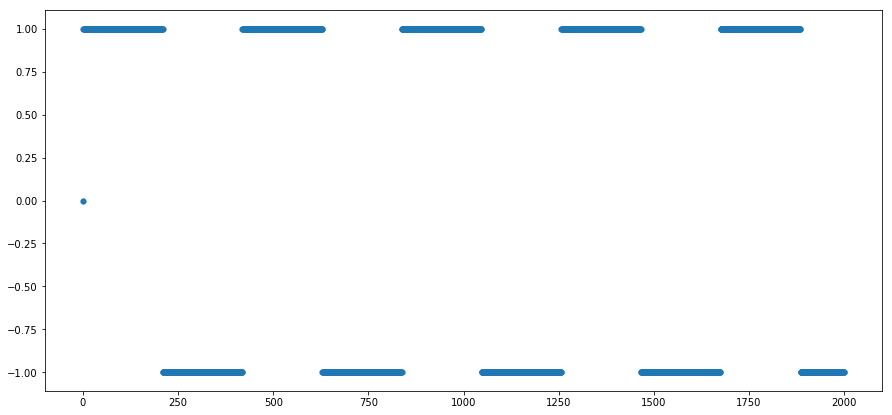

In [48]:
plt.figure(figsize=(15, 7))
plt.scatter(range(len(s2)), s2, linewidth=0.2)

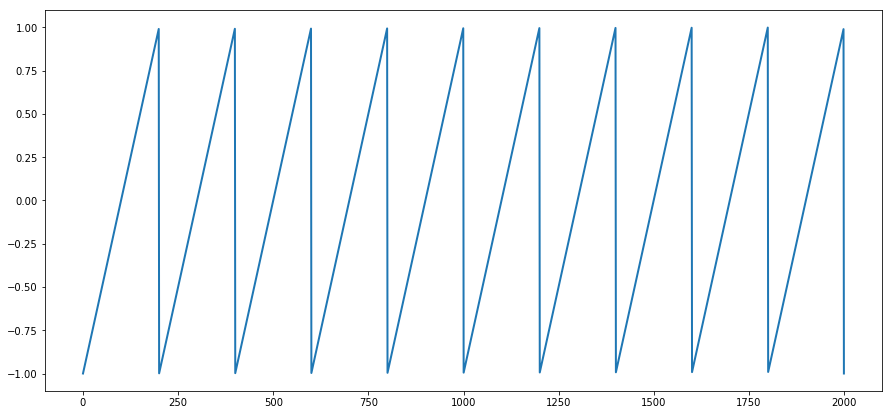

In [55]:
plt.figure(figsize=(15, 7))
plt.plot(range(len(s3)), s3, linewidth=2)

In [56]:
S

array([[ 0.        ,  0.        , -1.        ],
       [ 0.01000484,  1.        , -0.989995  ],
       [ 0.02000867,  1.        , -0.97998999],
       ..., 
       [ 0.90459731, -1.        ,  0.97998999],
       [ 0.90881676, -1.        ,  0.989995  ],
       [ 0.91294525, -1.        , -1.        ]])

In [57]:
S += 0.2 * np.random.normal(size=S.shape) # adds noise
S /= S.std(axis=0)
A = np.array([[1, 1, 1], [0.5, 2, 1], [1.5, 1, 2]])

In [58]:
X = np.dot(S, A.T)

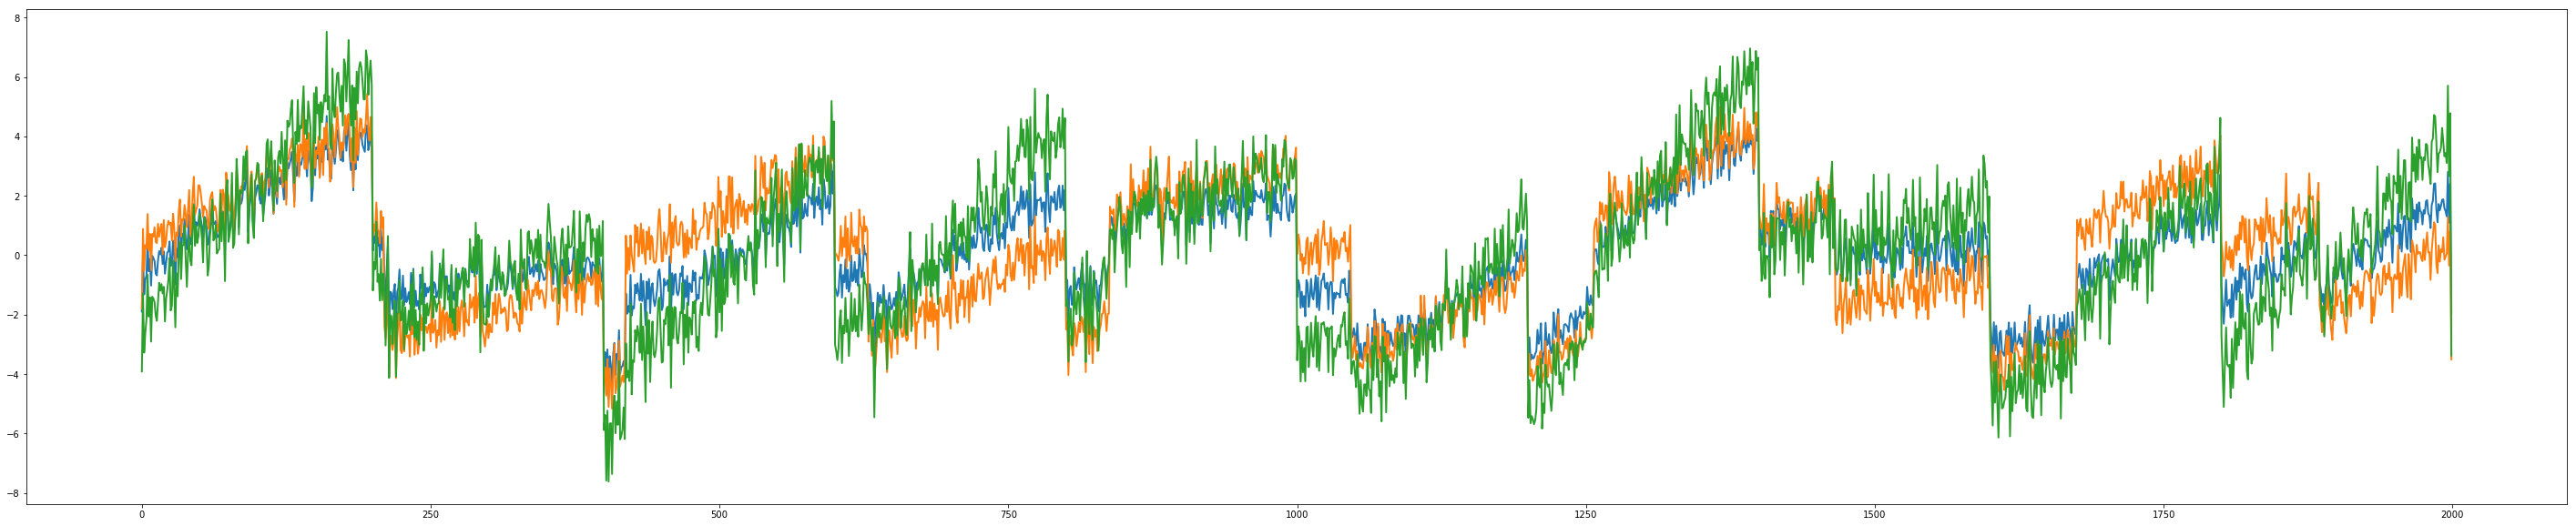

In [64]:
plt.figure(figsize=(50, 10))
plt.plot(range(len(X)), X, linewidth=2);